In [ ]:
import pandas as pd
df1=pd.read_csv("/content/train.csv")
df2=pd.read_csv("/content/test.csv")

# Combine using concat()
df_train = pd.concat([df1, df2])

In [ ]:
df_train.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [ ]:
print("Dataset Shape:", df_train.shape)
print("\nColumns in the dataset:", df_train.columns.tolist())

Dataset Shape: (124915, 3)

Columns in the dataset: ['category', 'sub_category', 'crimeaditionalinfo']


### **Empty or whitespace values, missing values, duplicates, charecters length < 150**

In [ ]:
df_train_cleaned = df_train.copy()
df_train_cleaned.dropna(subset=['crimeaditionalinfo'] ,inplace=True)

In [ ]:
# 1. Empty or whitespace values
def strip_warn(row):
    try:
        x = row.strip()
        return x
    except:
        print(row)
        return ""


print(df_train_cleaned[df_train_cleaned['crimeaditionalinfo'].str.strip().str.len() == 0].shape)
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(strip_warn)
df_train_cleaned = df_train_cleaned[df_train_cleaned['crimeaditionalinfo'].str.strip().str.len() > 0]

(1582, 3)


In [ ]:
# 2. Missing values
print(df_train_cleaned.isnull().sum())

category                 0
sub_category          8758
crimeaditionalinfo       0
dtype: int64


In [ ]:
# df_train_cleaned=df_train_cleaned.dropna(subset=["crimeaditionalinfo"])

In [ ]:
# 3. Duplicates
print(df_train_cleaned.duplicated().sum())

11295


In [ ]:
df_train_cleaned=df_train_cleaned.drop_duplicates()

In [ ]:
print(df_train_cleaned['crimeaditionalinfo'].duplicated().sum())

643


In [ ]:
df_train_cleaned = df_train_cleaned.drop_duplicates(subset=['crimeaditionalinfo'])

In [ ]:
# 4. Character length check
count_less_than_150 = df_train_cleaned[df_train_cleaned['crimeaditionalinfo'].str.len() <= 150].shape[0]
print("Number of rows with less than 150 characters in the crimeaditionalinfo column:", count_less_than_150)

Number of rows with less than 150 characters in the crimeaditionalinfo column: 8237


In [ ]:
# Keep only rows where text length is > 150 characters
df_train_cleaned = df_train_cleaned[df_train_cleaned['crimeaditionalinfo'].str.len() > 150]

# Reset index
df_train_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
df_train_cleaned.shape

(103130, 3)

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [ ]:
df_train_cleaned.sample(10)

,category,sub_category,crimeaditionalinfo
19361,Online Financial Fraud,UPI Related Frauds,CALL KR K PAISE TRANSFER RWAYA HAI OR PAISE LIYA PHLE UNSE SERVISE DENE KA BOL KR KA KRWAYA FIR SERVIS CHARD LIYA FIR SECORITY DEPOJT LOBOL KR DOR BAR TRANFER KRBAYA FIR POLICE VERFICATIN BOL KR KRBAYA
46173,Any Other Cyber Crime,Other,Gani Gafur Patel told me he is a big land or property agent and would help me sell my agricultural land at very good price for which he wanted some govt documents like NA copy DPR plan etc for my land and took money online from phone pay account fraudulently without doing anything and is absconding now and not paying back any amount nor coming in person to report the problem He took similar money from one of my employees also at the same time for same work and duped him also I paid him Rs on Feb and my employee paid him a total of on Feb and Feb He is a big online fraudster and has been duping many like this by finding land owners numbers from paper advertisements and contacting them by giving false promises and taking money online and doing nothing
51709,Online Financial Fraud,UPI Related Frauds,FRAUD THROUGH UPI Fraud PhonePE\r\nBANK \t STATE BANK OF INDIA \r\n\r\nACCOUNT NUMBER \r\n\r\nTOTAL AMOUNT \r\n\r\nPLEASE HOLD REVERSE TOTAL AMOUNT IN THE COMPLAINT ACCOUNT AND TAKE NECESSARY ACTION
51831,Child Pornography CPChild Sexual Abuse Material CSAM,NaN,Found this user uTraditionalBite spreading and encouraging wrong content towards minors on Reddit The subreddit rDegradeBollyWhores is full of shameful and demeaning content involving women of all kinds More can be found on the users profile page
5379,Online Financial Fraud,DematDepository Fraud,SIR THIS WHATSAPP NO SEND ME A QR CODE AND SAYS TO ME YOU CAN PAYMENT ON THIS QR CODE \r\nI AM FROM RICH CASH APP EMPLOYEE \r\nRICH CASH APP IS A FINANCE APP AND HE CLAIMED\r\nHER COMPANY IS INSTANT LOAN IN DAYS \r\nSO I AM PAYMENT ONLINE AND OTHER WHATSAPP NO IS SEND ME SIR YOUR PAYMENT IS DUE SO I AM SAY SIR I AM ALREADY PAID MONEY RUPEES AND HE SAY SIR YOUR HAVE FRAUD OTHER PERSON AND YOU CAN COMPALAINT CYBER CRIME\r\nSO I AM GOTO NEAREST POLICE STATION HE SAY WE ARE NOT FILLED CYBER CRIME COMPLAINT YOU ARE COMPAINT ONLINE CYBER CRIME \r\n\r\nSO \r\n KINEDLY FREQUEST TO YOU SIR PLEASE REFUND MY MONEY \r\n\r\nTHANK YOU SIR
73063,Any Other Cyber Crime,Other,I got WhatsApp messages from and regarding a job in the tata group they asked me to submit a rupee for the gate pass httpstatajobsmrtblogspotcom they also sent me this link which is looking fake please take necessary action thank you
43475,Online Financial Fraud,Fraud CallVishing,I have received a phone call from today at PM he asked me to open my phone pe and see the notification there was a request for rs He asked me to approve that but I didnt do that i realised thta it is a fraud call
36722,Online and Social Media Related Crime,Cheating by Impersonation,Got a call from number and told me they are calling from ajio and I have selected for purchasing the product and asked me to select the product for the payment of or to purchase a giftcard of and I have purchased a gift card through google pay and after that when they have asked me dispatch GST payment I have asked the refund and they have shut the phone
100450,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDebit Cards Fraud PAN Card Linkage\r\nThe Victim received an SMS with a weblink to update his PAN details Upon clicking on the link he was directed to a webportal to enter his banking credential and his OTPs This resulted in amount being debited from his account twice \r\nFraud message\r\nDear Customer your SBI NET BANKING Account will be Suspended by todayPlease Update Your Pancard now visit the link httpscuttlyBOiNSY
33570,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,Hello sir my account number is in HDFC branch Gadchiroli by FRAUD from my account munna kumar the person from MICRO ATM SE has wi

### **Reduce noise in data**

In [ ]:
! pip install contractions -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.0 MB/s eta 0:00:00


In [ ]:
# Import required libraries
import re
import unicodedata
import contractions


# Fix encoding and handle accented characters
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: unicodedata.normalize('NFKD', x))
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: x.encode('ascii', 'ignore').decode('utf-8'))

# Expand contractions
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: contractions.fix(x))

# Remove noise but keep periods
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: x.lower())
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: re.sub(r'\S+@\S+', '', x))
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))
# Modified to keep periods while removing other punctuation
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: re.sub(r'[^\w\s\.]', '', x))
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: re.sub(r'\s+', ' ', x))
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: x.strip())

In [ ]:
df_train_cleaned.sample(10)

,category,sub_category,crimeaditionalinfo
68921,Online Financial Fraud,Fraud CallVishing,i received call on th january he made fraudulent words and drawn rs above from my account from th to th january and also withdrawal money from atm hence i request to take necessary action and do justice thank you
50693,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,impersonation cheating as victim have recharge shop a person called and asked to install the my recaharge app so that they will provide the offers so to victim they asked to recharge with rs first by using debit card so he had done the same and insatlled any desk app later on amount was debited from victim acconutdebit card no
49638,Sexually Obscene material,NaN,make contact through whatsapp and then captured some private photos and videos now blackmailing for money or threatening to make them public over social media threatening to share video to all my family and friends
76601,Any Other Cyber Crime,Other,i contacted him through facebookhe is self styled consultant who told that i will send you abroad for jobwhen i send him my passport and resume then he told me for moneyand i transferred him rsbut till this date he is absconding and looted my money kindly help me to trace this person and my money to send back
39710,Online and Social Media Related Crime,FakeImpersonating Profile,using my profile and aending messages from above suspecting mobile to our colleagues some numbers kindly block that number and initiate necessary action thank you
93718,Any Other Cyber Crime,Other,please help me sir tp give my money back i am studying in visakhapatnam by the purpose of study i take a loan in the mobile loan app in this way i lost my money total eighteen hundred and twenty nine rupees
96764,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,a girl video called me naked and now posting the video online and asking money in return phone numbers used by that girl and now she is calling and messaging and uploaded the video and blackmailing me
63223,Hacking Damage to computercomputer system etc,Unauthorised AccessData Breach,last time i complain for hack phone contacts sms gallery misuse data documentsacknowledgement number after that criminals stopped message to my contact list buy today they start again sending shameful message to my contact list so plz help me what can i do now
13014,Any Other Cyber Crime,Other,ek aadmi jiska nam aashish massey h usne job ka bharosa dila k mere sath rs ka froud kr diya us aadami se paise mangta hu to mujhe taal deta hai wo aadami dehli ka rhe wala haiplzzz help me mujhe mere paise waise lautane ki krip kre ki usne mujhe slip di h baaki ki bas transition id h mere pe jo ki pdf m dal di h saath mai ki transition id bhi h pdf mai
77145,Online Financial Fraud,UPI Related Frauds,mr jitendra shashikant zope is person who is willing to take my house on rent he is conrtinously calling me for getting details of my house then he is calling me for sending deposit he is sending qr code for receiving deposit but ia m blocking the person


Language detection for stop word removal
(on hold)

In [ ]:
'''!pip install indic-nlp-library langdetect
!pip install polyglot
!pip install pyicu
!pip install pycld2

import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from indicnlp.tokenize import indic_tokenize
from indicnlp.normalize import indic_normalize
import re
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    # Normalize Indic text
    if lang in ["hi", "bn", "ta", "te", "mr"]:
        normalizer = indic_normalize.Normalizer()
        text = normalizer.normalize(text)

    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenization
    words = text.split() if lang == "en" else indic_tokenize.trivial_tokenize(text)

    # Stopword removal and lemmatization
    if lang == "en":
        words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    elif lang in ["hi", "bn", "ta", "te", "mr"]:
        words = [word for word in words if word not in indic_stopwords]

    return " ".join(words)

'''

'!pip install indic-nlp-library langdetect\n!pip install polyglot\n!pip install pyicu\n!pip install pycld2\n\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom nltk.corpus import stopwords\nfrom nltk.stem import WordNetLemmatizer\nfrom indicnlp.tokenize import indic_tokenize\nfrom indicnlp.normalize import indic_normalize\nimport re\nimport nltk\n\nnltk.download(\'stopwords\')\nnltk.download(\'wordnet\')\nnltk.download(\'punkt\')\n\ndef preprocess_text(text):\n    if not isinstance(text, str):\n        return ""\n\n    # Normalize Indic text\n    if lang in ["hi", "bn", "ta", "te", "mr"]:\n        normalizer = indic_normalize.Normalizer()\n        text = normalizer.normalize(text)\n\n    # Remove special characters and digits\n    text = re.sub(r\'[^\\w\\s]\', \'\', text)\n    text = re.sub(r\'\\d+\', \'\', text)\n\n    # Tokenization\n    words = text.split() if lang == "en" else indic_tokenize.trivial_tokenize(text)\n\n    # Stopword removal and lemmatization\n    if lang ==

## **Stop-word removal, lemmatization, vectorization, tokenization, normalization**

In [ ]:
! pip install nltk indic-nlp-library cleanlab unidecode autocorrect -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
import re
import nltk
import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
indic_stopwords = set([
    "aur", "ki", "hai", "huyi", "ho", "mein", "ye", "ke", "jo", "saath", "ko",
    "bhi", "tatha", "par", "se", "kisi", "un", "apna", "tum", "main", "aap", "inhe",
    "in", "abhi", "ab", "woh", "hum", "unka", "is", "us", "kintu", "athva", "nahin",
    "kar","firto","fir","kese","esse","ka","kabhi","karna"
])
stop_words=stop_words.union(indic_stopwords)

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Normalize Unicode characters
    text = unidecode.unidecode(text)

    # Tokenization
    words = word_tokenize(text)

    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    # Removing stopwords
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

In [ ]:
# Apply preprocessing
df_train_cleaned["crimeaditionalinfo"] = df_train_cleaned.apply(lambda row: preprocess_text(row["crimeaditionalinfo"]), axis=1)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import cleanlab
from cleanlab.classification import CleanLearning
from sklearn.linear_model import LogisticRegression

In [ ]:
# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_train_cleaned["crimeaditionalinfo"])

In [ ]:
'''
#Dont run unless you really have to check
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)
'''

'\n#Dont run unless you really have to check\ntf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())\n\nfinal_df = tf_idf\n\nprint("{} rows".format(final_df.shape[0]))\nfinal_df.T.nlargest(5, 0)\n'

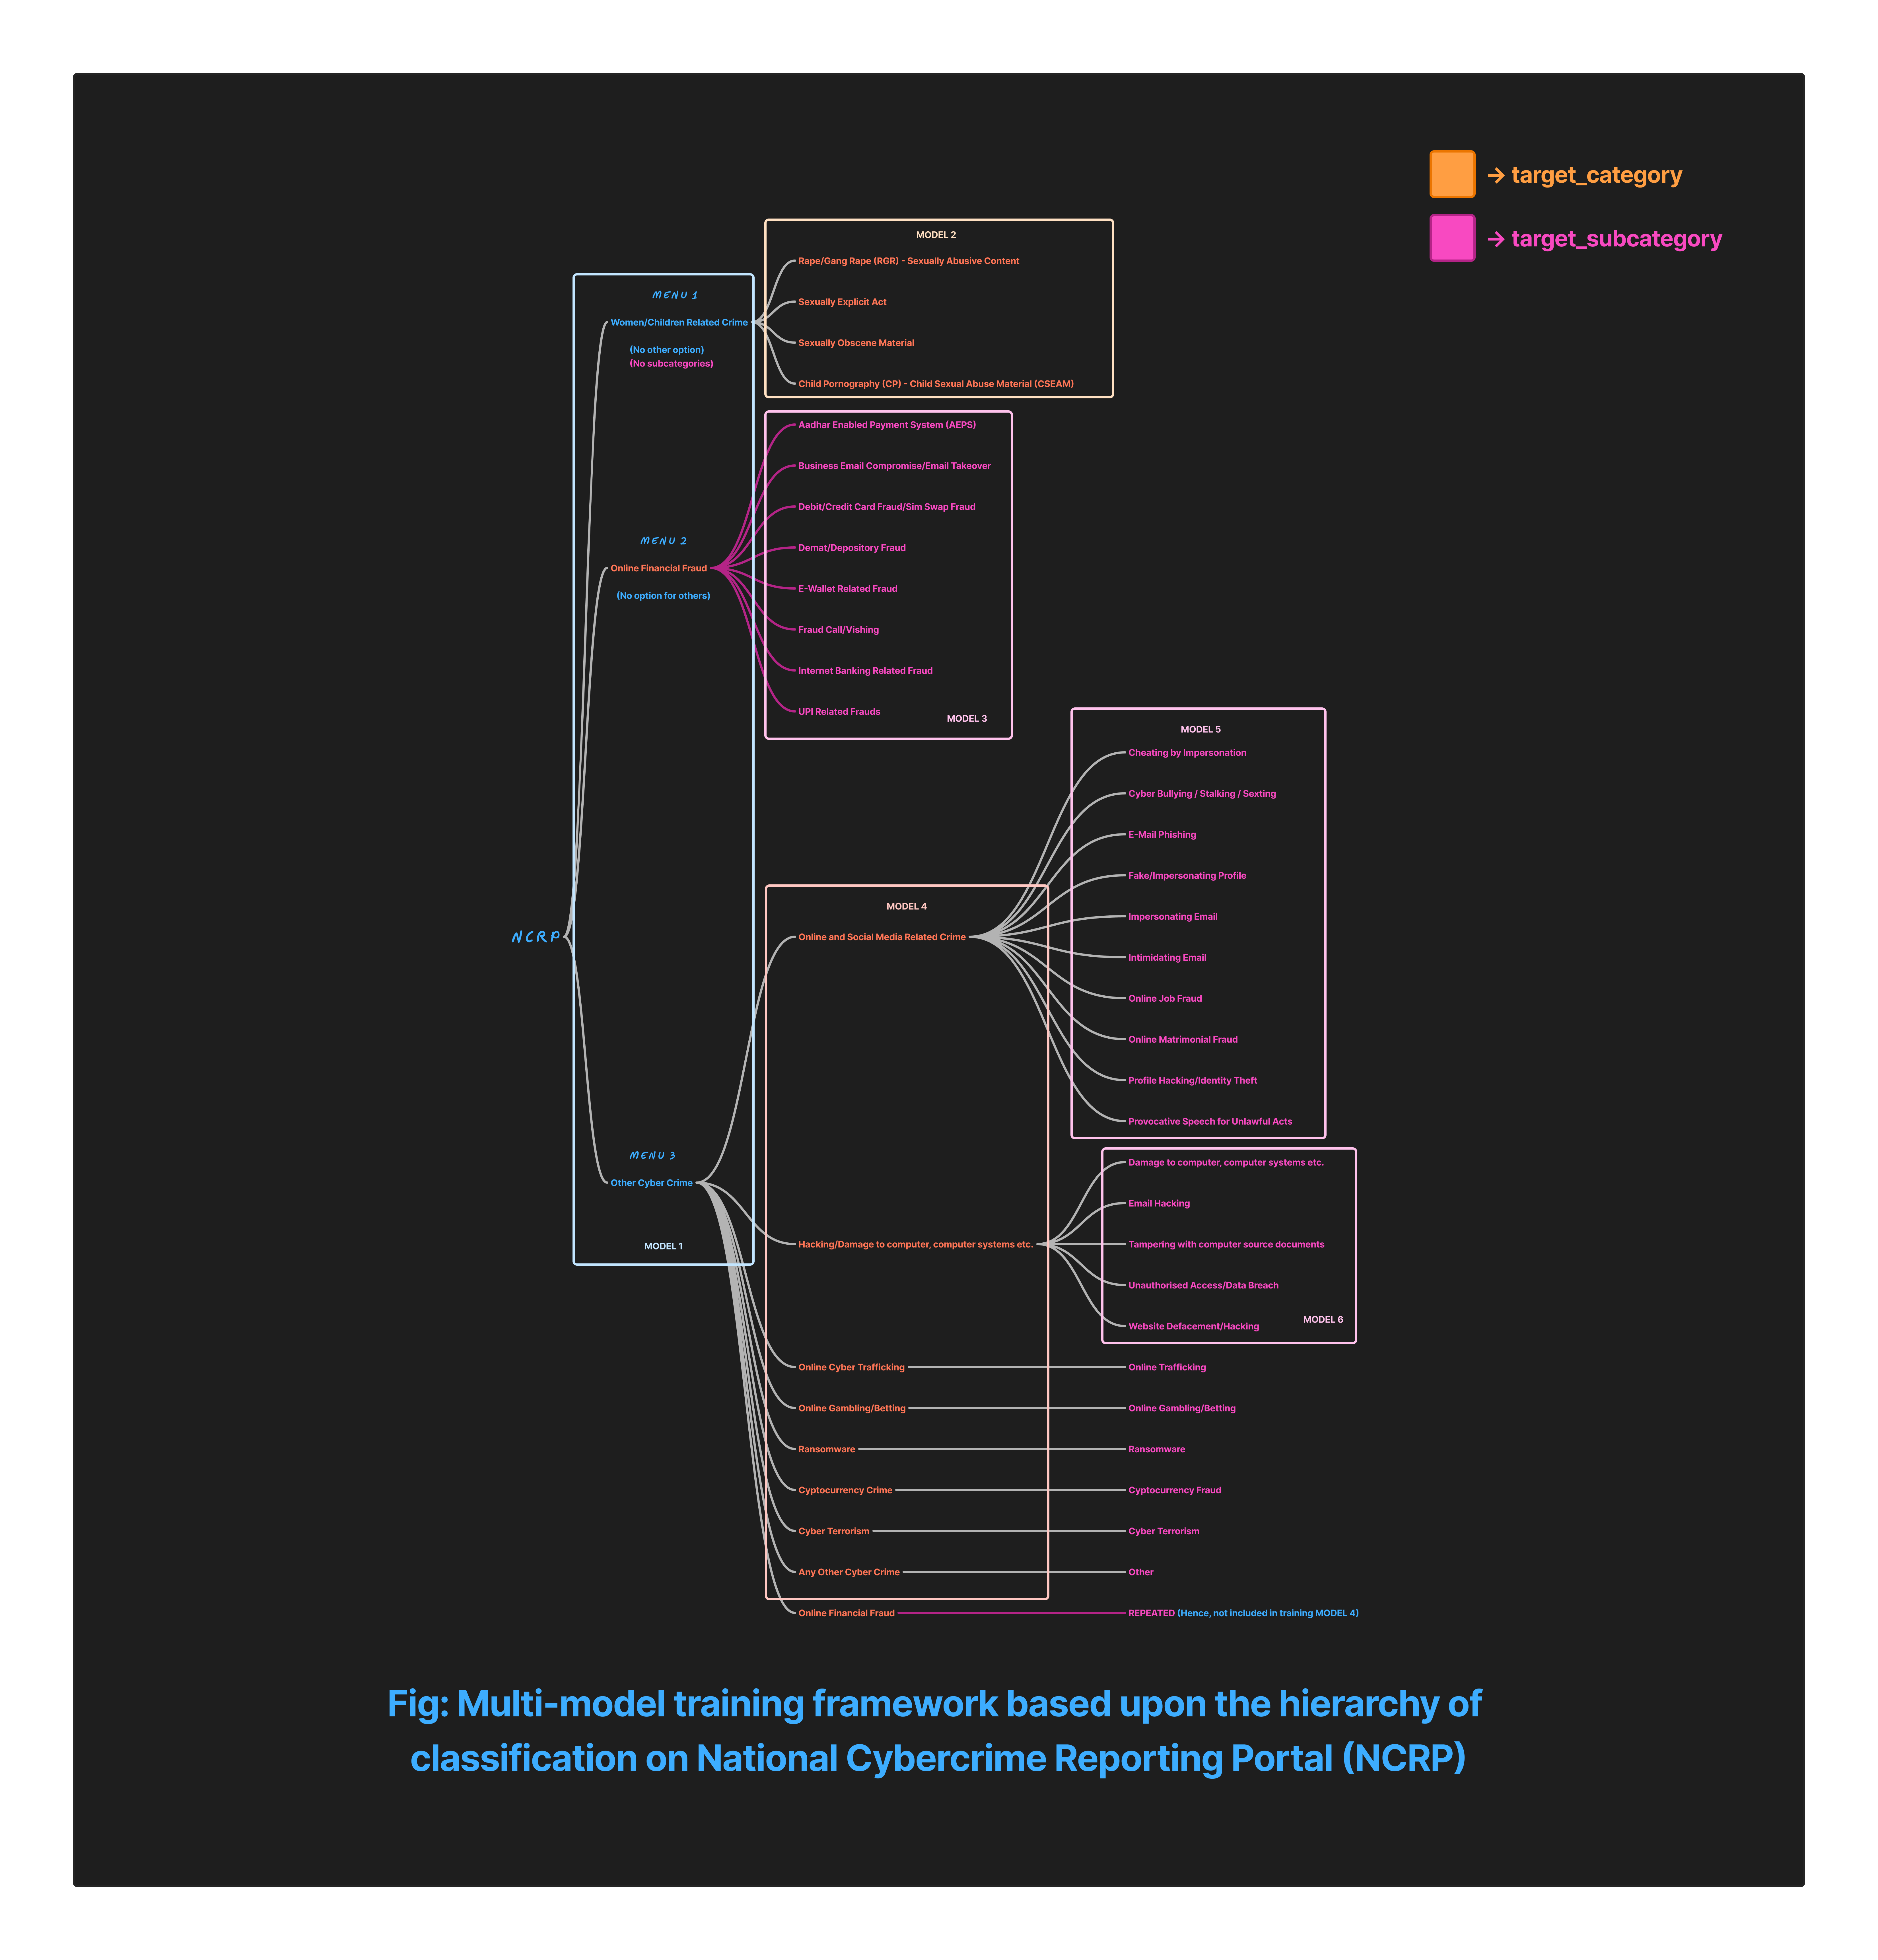##BiLSTM approach

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Input, RepeatVector, TimeDistributed
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [ ]:
df2=df_train_cleaned.copy()

In [ ]:
# Load Pretrained GloVe Embeddings (100D)
embedding_index = {}
with open("/content/glove.6B.100d.txt", encoding="utf-8") as f:  # Replace with actual GloVe file
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coefs

In [ ]:
# Tokenization & Padding
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df2['crimeaditionalinfo'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(df2['crimeaditionalinfo'])
padded_sequences = pad_sequences(sequences, maxlen=200, padding='post')


In [ ]:
# Prepare Embedding Matrix
embedding_dim = 100  # Must match GloVe vector dimension
embedding_matrix = np.zeros((5000, embedding_dim))
for word, i in word_index.items():
    if i < 5000:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [ ]:
# Get unique classes
classes = np.unique(df2['category'])

# Compute class weights
class_weights = compute_class_weight('balanced', classes=classes, y=df2['category'])

# Convert to a dictionary
class_weights_dict = dict(zip(classes, class_weights))

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
df2['category_encoded'] = label_encoder.fit_transform(df2['category'])


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, df2['category_encoded'], test_size=0.2, random_state=42
)

In [ ]:
print("Class Weights:", class_weights_dict)

Class Weights: {'Any Other Cyber Crime': 0.47805569977008083, 'Child Pornography CPChild Sexual Abuse Material CSAM': 14.45207399103139, 'Crime Against Women & Children': 1611.40625, 'Cryptocurrency Crime': 10.429813915857606, 'Cyber Attack/ Dependent Crimes': 1.3238087903060176, 'Cyber Terrorism': 31.289441747572816, 'Hacking  Damage to computercomputer system etc': 2.9271684831970934, 'Online Cyber Trafficking': 27.782866379310345, 'Online Financial Fraud': 0.10615149618748045, 'Online Gambling  Betting': 11.510044642857142, 'Online and Social Media Related Crime': 0.42241464054000916, 'Ransomware': 87.10304054054055, 'RapeGang Rape RGRSexually Abusive Content': 20.79233870967742, 'Report Unlawful Content': 6445.625, 'Sexually Explicit Act': 3.437666666666667, 'Sexually Obscene material': 2.8394823788546257}


In [ ]:
# Build LSTM model
model = Sequential([
    Embedding(5000, 64, input_length=200),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history=model.fit(X_train_resampled, y_train_resampled, epochs=5, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/5
22783/22783 ━━━━━━━━━━━━━━━━━━━━ 9121s 400ms/step - accuracy: 0.3231 - loss: 1.9590 - val_accuracy: 0.6913 - val_loss: 0.9465
Epoch 2/5
14813/22783 ━━━━━━━━━━━━━━━━━━━━ 52:47 397ms/step - accuracy: 0.5199 - loss: 1.4155

In [ ]:
# Predict on the entire dataset
y_pred = model.predict(X)  # Use the entire dataset's features
y_pred_labels = np.argmax(y_pred_all, axis=1)

# Add predicted categories to the dataframe
df2['predicted_category'] = label_encoder.inverse_transform(y_pred_labels_all)

# Check for mismatches between actual and predicted categories
df2['mislabel_flag_lstm'] = df2['category'] != df2['predicted_category']

# Filter for mislabelled rows
mislabelled_data = df2[df2['mislabel_flag_lstm']]

print("Mislabelled Data:")
print(mislabelled_data)



In [ ]:
# Print potential mislabeled cases
mislabeled_cases = df2[df2['mislabel_flag_lstm']]
# Count the number of mislabeled cases
mislabeled_count = df2['mislabel_flag_lstm'].sum()

# Print the count
print(f"Number of mislabeled cases: {mislabeled_count}")

In [ ]:
# Save DataFrame as CSV
df2.to_csv('relabelled_data_lstm_withsmote.csv', index=False)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
# Compute Accuracy, Precision, Recall, and F1-Score
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted')

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Over Epochs")
plt.legend()
plt.show()

In [ ]:
# Mapping of sub-categories to main categories
CATEGORY_TO_MAIN = {
    "Financial Fraud": [
        "Cryptocurrency Crime", "Online Financial Fraud", "Online Gambling  Betting"
    ],
    "WomenChildren Related Crime": [
        "Child Pornography CPChild Sexual Abuse Material CSAM", "RapeGang Rape RGRSexually Abusive Content",
        "Sexually Explicit Act", "Sexually Obscene material"
    ],
    "Other Cyber Crimes": [
        "Any Other Cyber Crime", "Cyber Terrorism", "Online Cyber Trafficking",
        "Cyber Attack/ Dependent Crimes", "Hacking  Damage to computercomputer system etc",
        "Ransomware", "Online and Social Media Related Crime"
    ]
}

# Reverse the mapping to make it easier to filter the dataframe
sub_category_to_main = {sub: main for main, subs in CATEGORY_TO_MAIN.items() for sub in subs}

# Create a new column for main categories
df2['main_category'] = df2['predicted_category'].map(sub_category_to_main)

# Split the dataset into three major categories
financial_fraud_df = df2[df2['main_category'] == 'Financial Fraud']
women_children_crime_df = df2[df2['main_category'] == 'WomenChildren Related Crime']
other_cyber_crimes_df = df2[df2['main_category'] == 'Other Cyber Crimes']

# Export to CSV files
financial_fraud_df.to_csv('financial_fraud.csv', index=False)
women_children_crime_df.to_csv('women_children_crime.csv', index=False)
other_cyber_crimes_df.to_csv('other_cyber_crimes.csv', index=False)

print("Datasets successfully separated and saved!")